# **Tabular Reinforcement Learning**

# SARSA on FrozenLake environment

## Non-Evaluables Practical Exercices

This is a non-evaluable practical exercise, but it is recommended that students complete it fully and individually, since it is an important part of the learning process.

The solution will be available, although it is not recommended that students consult the solution until they have completed the exercise. 

## The FrozenLake environment

In this activity, we are going to implement the **Value Iteration** algorithm on [Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) environment.

Main characteristics:
- The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.
- Holes in the ice are distributed in set locations when using a pre-determined map or in random locations when a random map is generated.
- The player makes moves until they reach the goal or fall in a hole.
- The lake is slippery (unless disabled) so the player may move perpendicular to the intended direction sometimes (see _is_slippery_ param).

<img src="https://gymnasium.farama.org/_images/frozen_lake.gif" />

## SARSA

<u>Question 1</u>: : **Implement the *SARSA* algorithm** explained in the "Temporal Difference Learning" module using the following parameters:

- Number of episodes = 1000000
- *learning rate* = 0.5
- *discount factor* = 1
- *epsilon* = 0.05  

<u>Question 2</u>: Once you have coded the algorithm, try different **values for the hyperparameters** and comment the best ones (providing an empirical comparison):

- Number of episodes
- *learning rate* 
- *discount factor* 
- *epsilon*

<u>Question 3</u>: Try to solve the same environment but using a _8 x 8_ grid (also in slippery mode):
> gym.make(ENV_NAME, desc=None, map_name="8x8", is_slippery=True)

In [1]:
import gymnasium as gym

# params
ENV_NAME = "FrozenLake-v1"
GAMMA = 0.9
TEST_EPISODES = 20

# definig the environment
env = gym.make(ENV_NAME, desc=None, map_name="4x4", is_slippery=False)

print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(4) 
Observation space is Discrete(16) 
Reward range is (0, 1) 


In [ ]:
def epsilon_greedy_policy(Q, state, nA, epsilon):
    '''
    Create a policy where epsilon dictates the probability of a random action being carried out.

    :param Q: link state -> action value (dictionary)
    :param state: state in which the agent is (int)
    :param nA: number of actions (int)
    :param epsilon: possibility of random movement (float)
    :return: probability of each action (list) d
    '''

    probs = np.ones(nA)
    
    return probs


def SARSA(episodes, learning_rate, discount, epsilon):
    '''
    Learn to solve the environment using the SARSA algorithm

    :param episodes: Number of episodes (int)
    :param learning_rate: Learning rate (float [0, 1])
    :param discount: Discount factor (float [0, 1])
    :param epsilon: chance that random movement is required (float [0, 1])
    :return: x,y number of episodes and number of steps
    :Q: action value function
    '''

    # Link actions to states
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    return Q

<div class="alert alert-block alert-danger">
<strong>Solution</strong>
</div>

In [2]:
import numpy as np


def epsilon_greedy_policy(Q, state, nA, epsilon):
    '''
    Create a policy where epsilon dictates the probability of a random action being carried out.

    :param Q: link state -> action value (dictionary)
    :param state: state in which the agent is (int)
    :param nA: number of actions (int)
    :param epsilon: possibility of random movement (float)
    :return: probability of each action (list) d
    '''
    probs = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[state])
    probs[best_action] += (1.0 - epsilon)

    return probs

In [3]:
from collections import defaultdict
import sys
from tensorboardX import SummaryWriter

# writer
writer = SummaryWriter(comment="-mc_control")


def SARSA(env, episodes:int, learning_rate:float, discount:float, epsilon:float):
    '''
    Learn to solve the environment using the SARSA algorithm

    :param episodes: Number of episodes (int)
    :param learning_rate: Learning rate (float [0, 1])
    :param discount: Discount factor (float [0, 1])
    :param epsilon: chance that random movement is required (float [0, 1])
    :return: x,y number of episodes and number of steps
    :Q: action value function
    '''

    # Link actions to states
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Rewards
    y = np.zeros(episodes)
    a = defaultdict(lambda: 0)
    wins = 0
    
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        # Select and execute an action
        probs = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
        action = np.random.choice(np.arange(len(probs)), p=probs)
        
        # train bucle for each episode
        step = 1
        total_reward = 0
        while not done:
            # TODO
            a[action] += 1
        
            # Execute action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Select and execute action
            probs = epsilon_greedy_policy(Q, next_state, env.action_space.n, epsilon)
            next_action = np.random.choice(np.arange(len(probs)), p=probs)
           
            # Update TD
            td_target = reward + discount * Q[next_state][next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += learning_rate * td_error

            total_reward += reward
            if done:
                y[episode] = total_reward
                if reward > 0:
                    wins += 1
                break

            state = next_state
            action = next_action
            step += 1
            
        # write to summary
        writer.add_scalar("reward", total_reward, episode)

        # We print which episode we are in, useful for debugging.
        if episode % 100 == 0 and episode > 0:
            print("\rEpisode {:8d}/{:8d} - Average reward {:.2f}".format(episode, episodes, np.average(y[(episode-100):episode])), end="")
            sys.stdout.flush()
            
    print("")
    print(a)
    print(wins)
                 
    return y, Q

In [4]:
y, q = SARSA(env, episodes=1000, learning_rate=0.5, discount=1.0, epsilon=0.5)

Episode      900/    1000 - Average reward 0.32
defaultdict(<function SARSA.<locals>.<lambda> at 0x7f9ba2447280>, {0: 5229, 2: 2557, 3: 2281, 1: 2699})
193


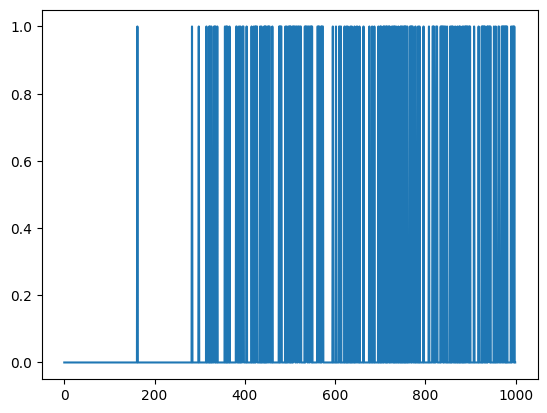

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(y)
plt.show()

In [6]:
# print the Q action-value function
def print_Q_function(q):
    for k in sorted(q.keys()):
        print("State {:2d}: {}".format(k, q[k]))

print_Q_function(q)

State  0: [0.21659466 0.29478631 0.26565657 0.26426961]
State  1: [0.31077241 0.         0.29520492 0.08358048]
State  2: [0.29420305 0.57918905 0.28324697 0.26766848]
State  3: [0.27521733 0.         0.1342232  0.1474857 ]
State  4: [0.14071249 0.41000329 0.         0.27746482]
State  5: [0. 0. 0. 0.]
State  6: [0.         0.71571134 0.         0.29092772]
State  7: [0. 0. 0. 0.]
State  8: [0.39557796 0.         0.59591422 0.24651677]
State  9: [0.52471059 0.76136254 0.87436283 0.        ]
State 10: [0.67693493 0.78877849 0.         0.16474817]
State 11: [0. 0. 0. 0.]
State 12: [0. 0. 0. 0.]
State 13: [0.         0.43016438 0.99914061 0.7525202 ]
State 14: [0.73627285 0.83908721 1.         0.39340102]
State 15: [0. 0. 0. 0.]


In [7]:
# execution of an episode following the optimal policy
def execute_episode_SARSA(q, env, debug=False):
    obs, _ = env.reset()
    t, total_reward, done = 0, 0, False

    if debug:
        print("Obs initial: {} ".format(obs))

    while True: 
        # Choose an action following the optimal policy (no epsilon-greedy)
        arr = np.array(q[obs])
        action = arr.argmax()
       
        # Execute the action and wait for the response from the environment
        new_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        obs = new_obs
        if debug:
            print("Action: {} -> Obs: {} and reward: {}".format(action, obs, reward))

        total_reward += reward
        t += 1
        if done:
            break
   
    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
    return total_reward

In [8]:
execute_episode_SARSA(q, env, debug=True)

Obs initial: 0 
Action: 1 -> Obs: 4 and reward: 0.0
Action: 1 -> Obs: 8 and reward: 0.0
Action: 2 -> Obs: 9 and reward: 0.0
Action: 2 -> Obs: 10 and reward: 0.0
Action: 1 -> Obs: 14 and reward: 0.0
Action: 2 -> Obs: 15 and reward: 1.0
Episode finished after 6 timesteps and reward was 1.0 


1.0

In [9]:
from tensorboardX import SummaryWriter
writer = SummaryWriter(comment="-sarsa")

total_reward = 0.0
for iter_no in range(TEST_EPISODES):
    reward = execute_episode_SARSA(q, env)
    writer.add_scalar("reward", reward, iter_no)
    total_reward += reward

avg_reward = total_reward / TEST_EPISODES
print("Average reward is {} ({} episodes)".format(avg_reward, TEST_EPISODES))
if reward > 0.80:
    print("Environment solved!")

writer.close()

Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode finished after 6 timesteps and reward was 1.0 
Episode fi

### Hyperparameters grid search



In [10]:
def test_episodes(env, q, num_episodes):
    total_reward = 0.0
    for iter_no in range(num_episodes):
        reward = execute_episode_SARSA(q, env)
        total_reward += reward

    avg_reward = total_reward / TEST_EPISODES
    print("Average reward is {} ({} episodes)".format(avg_reward, TEST_EPISODES))
    if reward > 0.80:
        print("Environment solved!")

In [11]:
num_episodes = 20

for epsilon in np.arange (start=0, stop=1.0, step=0.1):
    print("Epsilon = {}".format(epsilon))
    y, q = SARSA(env, episodes=1000, learning_rate=0.5, discount=1.0, epsilon=epsilon)
    test_episodes(env, q, num_episodes)
          


Epsilon = 0.0
Episode      900/    1000 - Average reward 0.00
defaultdict(<function SARSA.<locals>.<lambda> at 0x7f9ba2af3790>, {0: 100000})
0
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Episode finished after 100 timesteps and reward was 0.0 
Ep